# <font color="blue"> Regression Using NN in Tensorflow</font>

Adam Hereth

Build a NN regression model for predicting video game sales.

You can download the dataset directly from [here](https://github.com/fereydoonvafaei/CMSC471-Spring2020/blob/master/Assignment-5/video-games.csv).

The description of the dataset you're going to work on can be seen [here](https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings). You are going to use the features to predict video game sales in Europe `EU_Sales`.

In [ ]:
# Load the data as a dataframe using pandas
game_data = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
print(game_data.shape)
game_data.head()

(16719, 16)


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Drop NAs
game_data = game_data.dropna()
print(game_data.shape)
game_data.head()

(6825, 16)


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [ ]:
# Drop "Name" column as it does not provide any useful info
game_data.drop('Name', axis=1, inplace=True)
print(game_data.shape)
game_data.head()

(6825, 15)


,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [ ]:
# Drop "Global_Sales" column as it is redundant feature - it's just sum of regional and other sales
game_data.drop('Global_Sales', axis=1, inplace=True)
print(game_data.shape)
game_data.head()

(6825, 14)


,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,76.0,51.0,8,322.0,Nintendo,E
2,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,80.0,73.0,8,192.0,Nintendo,E
6,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,58.0,41.0,6.6,129.0,Nintendo,E


In [ ]:
# Get feature vector X_reg (all columns but "EU_Sales") and target label y_reg as "EU_Sales"
X_reg = game_data.drop(columns=['EU_Sales'])
y_reg = game_data['EU_Sales']

In [ ]:
# Print X_reg shape and head
print(X_reg.shape)
X_reg.head()

(6825, 13)


,Platform,Year_of_Release,Genre,Publisher,NA_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii,2006.0,Sports,Nintendo,41.36,3.77,8.45,76.0,51.0,8,322.0,Nintendo,E
2,Wii,2008.0,Racing,Nintendo,15.68,3.79,3.29,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii,2009.0,Sports,Nintendo,15.61,3.28,2.95,80.0,73.0,8,192.0,Nintendo,E
6,DS,2006.0,Platform,Nintendo,11.28,6.50,2.88,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii,2006.0,Misc,Nintendo,13.96,2.93,2.84,58.0,41.0,6.6,129.0,Nintendo,E


In [ ]:
# Using pandas.get_dummies() create dummy variables for categorical features of X_reg
X_reg = pandas.get_dummies(X_reg)
print(X_reg.shape)
X_reg.head()

(6825, 1683)


,Year_of_Release,NA_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Count,Platform_3DS,Platform_DC,Platform_DS,Platform_GBA,Platform_GC,Platform_PC,Platform_PS,Platform_PS2,Platform_PS3,Platform_PS4,Platform_PSP,Platform_PSV,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Publisher_10TACLE Studios,Publisher_1C Company,Publisher_2D Boy,Publisher_3DO,...,Developer_Wizarbox,Developer_WorkJam,Developer_Wow Entertainment,Developer_Xpec,Developer_Yacht Club Games,Developer_Yager,Developer_Yuke's,"Developer_Z-Axis, Ltd.",Developer_Zed Two Limited,Developer_Zen Studios,Developer_Zener Works,Developer_ZeniMax Media,Developer_Zerodiv,Developer_Zindagi Games,Developer_Zipper Interactive,Developer_Zoe Mode,"Developer_Zoe Mode, HB Studios Multimedia",Developer_Zombie,Developer_Zombie Studios,Developer_Zono Inc.,Developer_Zoo Games,Developer_Zoom,Developer_ZootFly,Developer_h.a.n.d. Inc.,Developer_iNiS,Developer_id Software,"Developer_id Software, Nerve Software","Developer_id Software, Raven Software",Developer_n-Space,Developer_neo Software,Developer_odenis studio,Developer_syn Sophia,Developer_zSlide,Rating_AO,Rating_E,Rating_E10+,Rating_K-A,Rating_M,Rating_RP,Rating_T
0,2006.0,41.36,3.77,8.45,76.0,51.0,322.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2008.0,15.68,3.79,3.29,82.0,73.0,709.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,2009.0,15.61,3.28,2.95,80.0,73.0,192.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6,2006.0,11.28,6.50,2.88,89.0,65.0,431.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
7,2006.0,13.96,2.93,2.84,58.0,41.0,129.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


> <b>Note:</b> The output of the following cells is provided to you for your reference. All the following cells depend on the correctness of your preprocessing steps and can be verified by these outputs.

In [ ]:
# Normalize X_reg using mean() and std()  NOTE: The output is provided for your reference.
X_reg = (X_reg - X_reg.mean())/X_reg.std()
print(X_reg.shape)
X_reg.head()

(6825, 1683)


,Year_of_Release,NA_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Count,Platform_3DS,Platform_DC,Platform_DS,Platform_GBA,Platform_GC,Platform_PC,Platform_PS,Platform_PS2,Platform_PS3,Platform_PS4,Platform_PSP,Platform_PSV,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Publisher_10TACLE Studios,Publisher_1C Company,Publisher_2D Boy,Publisher_3DO,...,Developer_Wizarbox,Developer_WorkJam,Developer_Wow Entertainment,Developer_Xpec,Developer_Yacht Club Games,Developer_Yager,Developer_Yuke's,"Developer_Z-Axis, Ltd.",Developer_Zed Two Limited,Developer_Zen Studios,Developer_Zener Works,Developer_ZeniMax Media,Developer_Zerodiv,Developer_Zindagi Games,Developer_Zipper Interactive,Developer_Zoe Mode,"Developer_Zoe Mode, HB Studios Multimedia",Developer_Zombie,Developer_Zombie Studios,Developer_Zono Inc.,Developer_Zoo Games,Developer_Zoom,Developer_ZootFly,Developer_h.a.n.d. Inc.,Developer_iNiS,Developer_id Software,"Developer_id Software, Nerve Software","Developer_id Software, Raven Software",Developer_n-Space,Developer_neo Software,Developer_odenis studio,Developer_syn Sophia,Developer_zSlide,Rating_AO,Rating_E,Rating_E10+,Rating_K-A,Rating_M,Rating_RP,Rating_T
0,-0.341176,42.346639,12.886767,31.004904,0.413014,1.147975,0.250716,-0.15243,-0.045334,-0.270063,-0.189656,-0.231777,-0.324695,-0.149895,-0.44777,-0.356319,-0.190483,-0.246165,-0.132631,3.639573,-0.114938,-0.37917,-0.300404,-0.154431,-0.560105,-0.194169,-0.242123,-0.244150,-0.250487,-0.132631,-0.305018,-0.341257,-0.380685,-0.213283,2.497324,-0.201761,-0.012105,-0.01712,-0.012105,-0.046929,...,-0.012105,-0.012105,-0.027075,-0.03204,-0.020969,-0.024214,-0.084153,-0.046929,-0.012105,-0.012105,-0.012105,-0.01712,-0.020969,-0.012105,-0.034254,-0.034254,-0.012105,-0.012105,-0.024214,-0.01712,-0.012105,-0.012105,-0.01712,-0.029661,-0.024214,-0.034254,-0.012105,-0.020969,-0.043682,-0.012105,-0.012105,-0.01712,-0.012105,-0.012105,1.509226,-0.397162,-0.012105,-0.515485,-0.012105,-0.730971
2,0.133743,15.800856,12.956315,11.884655,0.845647,2.292368,0.909519,-0.15243,-0.045334,-0.270063,-0.189656,-0.231777,-0.324695,-0.149895,-0.44777,-0.356319,-0.190483,-0.246165,-0.132631,3.639573,-0.114938,-0.37917,-0.300404,-0.154431,-0.560105,-0.194169,-0.242123,-0.244150,-0.250487,-0.132631,3.278020,-0.341257,-0.380685,-0.213283,-0.400370,-0.201761,-0.012105,-0.01712,-0.012105,-0.046929,...,-0.012105,-0.012105,-0.027075,-0.03204,-0.020969,-0.024214,-0.084153,-0.046929,-0.012105,-0.012105,-0.012105,-0.01712,-0.020969,-0.012105,-0.034254,-0.034254,-0.012105,-0.012105,-0.024214,-0.01712,-0.012105,-0.012105,-0.01712,-0.029661,-0.024214,-0.034254,-0.012105,-0.020969,-0.043682,-0.012105,-0.012105,-0.01712,-0.012105,-0.012105,1.509226,-0.397162,-0.012105,-0.515485,-0.012105,-0.730971
3,0.371202,15.728496,11.182831,10.624793,0.701436,2.292368,0.029412,-0.15243,-0.045334,-0.270063,-0.189656,-0.231777,-0.324695,-0.149895,-0.44777,-0.356319,-0.190483,-0.246165,-0.132631,3.639573,-0.114938,-0.37917,-0.300404,-0.154431,-0.560105,-0.194169,-0.242123,-0.244150,-0.250487,-0.132631,-0.305018,-0.341257,-0.380685,-0.213283,2.497324,-0.201761,-0.012105,-0.01712,-0.012105,-0.046929,...,-0.012105,-0.012105,-0.027075,-0.03204,-0.020969,-0.024214,-0.084153,-0.046929,-0.012105,-0.012105,-0.012105,-0.01712,-0.020969,-0.012105,-0.034254,-0.034254,-0.012105,-0.012105,-0.024214,-0.01712,-0.012105,-0.012105,-0.01712,-0.029661,-0.024214,-0.034254,-0.012105,-0.020969,-0.043682,-0.012105,-0.012105,-0.01712,-0.012105,-0.012105,1.509226,-0.397162,-0.012105,-0.515485,-0.012105,-0.730971
6,-0.341176,11.252514,22.380122,10.365410,1.350385,1.876225,0.436270,-0.15243,-0.045334,3.702302,-0.189656,-0.231777,-0.324695,-0.149895,-0.44777,-0.356319,-0.190483,-0.246165,-0.132631,-0.274717,-0.114938,-0.37917,-0.300404,-0.154431,-0.560105,-0.1

In [ ]:
# Split the data to train and test with ratio of 80/20 for train/test respectively
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.20)
print(X_reg_train.shape)
print(y_reg_train.shape)
print(X_reg_test.shape)
print(y_reg_test.shape)

(5460, 1683)
(5460,)
(1365, 1683)
(1365,)


### Building NN for Regression

> You are recommended to try different architectures (different number of hidden layers and neurons) to get the desired loss. You may start with a couple of hidden layers and a few neurons and add accordingly until you hit below the maximum acceptable loss.

In [ ]:
# Build a sequential NN with appropriate layers for regression to predict EU_Sales
# Use ReLU for all hidden layers

layer_1 = tf.keras.layers.Dense(units=500, input_shape=[1683], activation='relu')
layer_2 = tf.keras.layers.Dense(30, activation='relu')
layer_3 = tf.keras.layers.Dense(20, activation='relu')
layer_4 = tf.keras.layers.Dense(10, activation='relu')
layer_5 = tf.keras.layers.Dense(1, activation='relu')
nn_reg = tf.keras.Sequential([
    # Add layers accordingly
    layer_1, layer_2, layer_3, layer_4, layer_5
    ])

In [ ]:
nn_reg.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               842000    
_________________________________________________________________
dense_2 (Dense)              (None, 30)                15030     
_________________________________________________________________
dense_3 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 857,871
Trainable params: 857,871
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile nn_reg: set both loss and metric to 'mse',
# and set the optimizer to 'RMSprop' with a learning rate of 0.001

# For this regression task, loss and metrics are the same
nn_reg.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.001), loss='mse', metrics=['mse'])
#opt = tf.keras.optimizers.RMSprop(learning_rate=0.001)
#nn_reg.compile(optimizer=, loss='mse', metrics=['mse'])

In [ ]:
# Fit the network on X_reg_train and y_reg_train with 20 epochs
nn_reg_history = nn_reg.fit(X_reg_train, y_reg_train, epochs=20)

Epoch 1/20
171/171 [==============================] - 2s 10ms/step - loss: 0.2013 - mse: 0.2013
Epoch 2/20
171/171 [==============================] - 2s 9ms/step - loss: 0.1298 - mse: 0.1298
Epoch 3/20
171/171 [==============================] - 2s 9ms/step - loss: 0.1273 - mse: 0.1273
Epoch 4/20
171/171 [==============================] - 2s 9ms/step - loss: 0.0943 - mse: 0.0943
Epoch 5/20
171/171 [==============================] - 2s 9ms/step - loss: 0.0991 - mse: 0.0991
Epoch 6/20
171/171 [==============================] - 2s 9ms/step - loss: 0.0798 - mse: 0.0798
Epoch 7/20
171/171 [==============================] - 2s 9ms/step - loss: 0.0779 - mse: 0.0779
Epoch 8/20
171/171 [==============================] - 2s 9ms/step - loss: 0.0699 - mse: 0.0699
Epoch 9/20
171/171 [==============================] - 2s 9ms/step - loss: 0.0662 - mse: 0.0662
Epoch 10/20
171/171 [==============================] - 2s 9ms/step - loss: 0.0621 - mse: 0.0621
Epoch 11/20
171/171 [===========================

(0.0, 1.0)

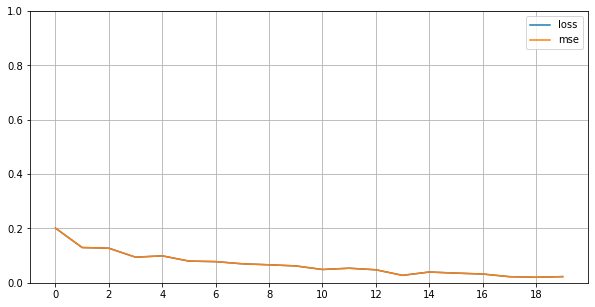

In [ ]:
pd.DataFrame(nn_reg_history.history).plot(figsize=(10, 5))
plt.grid(True)

# Set the xticks - label locations
plt.xticks(np.arange(0, 20, step=2))  

# set the y-axis range to [0-1]
plt.gca().set_ylim(0, 1) 

> <font color='red'>**Maximum Acceptable MSE Loss Requirement**</font>: The MSE loss of your model evaluated on `X_reg_test` and `y_reg_test` should not exceed **0.20**. Otherwise, your notebook will get NO CREDIT for this part, so you must fine-tune your `nn_reg` accordingly.

In [ ]:
# Evaluate the model on X_reg_test, y_reg_test
mse, mse = nn_reg.evaluate(X_reg_test, y_reg_test)

43/43 [==============================] - 0s 3ms/step - loss: 0.1426 - mse: 0.1426


In [ ]:
# Maximum acceptable mse loss: 0.20
round(mse, 2)

0.14